In [50]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

In [51]:
data_folder = "../data/"

figures_folder = "../Figures/"

sif_output = "../sif_files/"

In [52]:
Huri = pd.read_csv('../data/HURI_full_data_trasnlated.csv', usecols=["source_UniProtKB-Swiss-Prot", "target_UniProtKB-Swiss-Prot"])

In [53]:
Huri

,source_UniProtKB-Swiss-Prot,target_UniProtKB-Swiss-Prot
0,Q9H2S6,Q9NPE6
1,Q9H2S6,Q9BXK5
2,Q9H2S6,O60238
3,Q9H2S6,P20138
4,Q9H2S6,Q9UM44
...,...,...
75885,O14737,Q92993
75886,P04792,O43707
75887,P04792,Q9NPF5
75888,P31749,Q12778


In [54]:
resources = Resources()

In [55]:
mapping = {"source_UniProtKB-Swiss-Prot": "source", "target_UniProtKB-Swiss-Prot": "target"}
resources.add_database(Huri, column_mapping=mapping,  reset_index=True)

In [56]:
ssh_list = ['PTCH1',
 'SUFU',
 'SMO',
 'KMT2D',
 'KMT2C',
 'CREBBP',
 'GSE1',
 'BCOR',
 'GLI2',
 'TCF4',
 'TERT',
 'TP53',
 'BRCA2',
 'PTEN',
 'PRKAR1A',
 'EPHA7',
 'FBXW7',
 'DDX3X',
 'IDH1',
 'ATOH1',
 'BBX',
 'CEBPA',
 'DMRTA1',
 'NFATC1',
 'PBX1',
 'POU3F3',
 'POU6F2',
 'RARB',
 'SOX13',
 'SOX2',
 'TBX18']

In [57]:
ssh_net = Network(ssh_list, resources = resources.interactions)

Error: node EPHA7 is not present in the resources database
Error: node IDH1 is not present in the resources database
Error: node ATOH1 is not present in the resources database
Error: node BBX is not present in the resources database
Error: node DMRTA1 is not present in the resources database
Error: node POU3F3 is not present in the resources database


In [58]:
ssh_net.nodes

,Genesymbol,Uniprot,Type
0,PTCH1,Q13635,NaN
1,SUFU,Q9UMX1,NaN
2,SMO,Q99835,NaN
3,KMT2D,O14686,NaN
4,KMT2C,Q8NEZ4,NaN
5,CREBBP,Q92793,NaN
6,GSE1,Q14687,NaN
7,BCOR,Q6W2J9,NaN
8,GLI2,P10070,NaN
9,TCF4,P15884,NaN


In [59]:
%%time
ssh_net.complete_connection(maxlen=4, algorithm="bfs", only_signed=False, connect_with_bias=False, consensus=False)

CPU times: user 15 s, sys: 961 µs, total: 15 s
Wall time: 15 s


In [60]:
ssh_net.edges

,source,target,Type,Effect,References
0,Q9UMX1,Q96GZ6,None,undefined,;
1,Q96GZ6,P60201,None,undefined,;
2,P60201,O15393,None,undefined,;
3,O15393,Q13635,None,undefined,;
4,O14686,P61964,None,undefined,;
...,...,...,...,...,...
368,Q16512,A8MQ03,None,undefined,
369,Q96B97,A8MQ03,None,undefined,
370,Q15415,Q15287,None,undefined,
371,O00560,P56545,None,undefined,


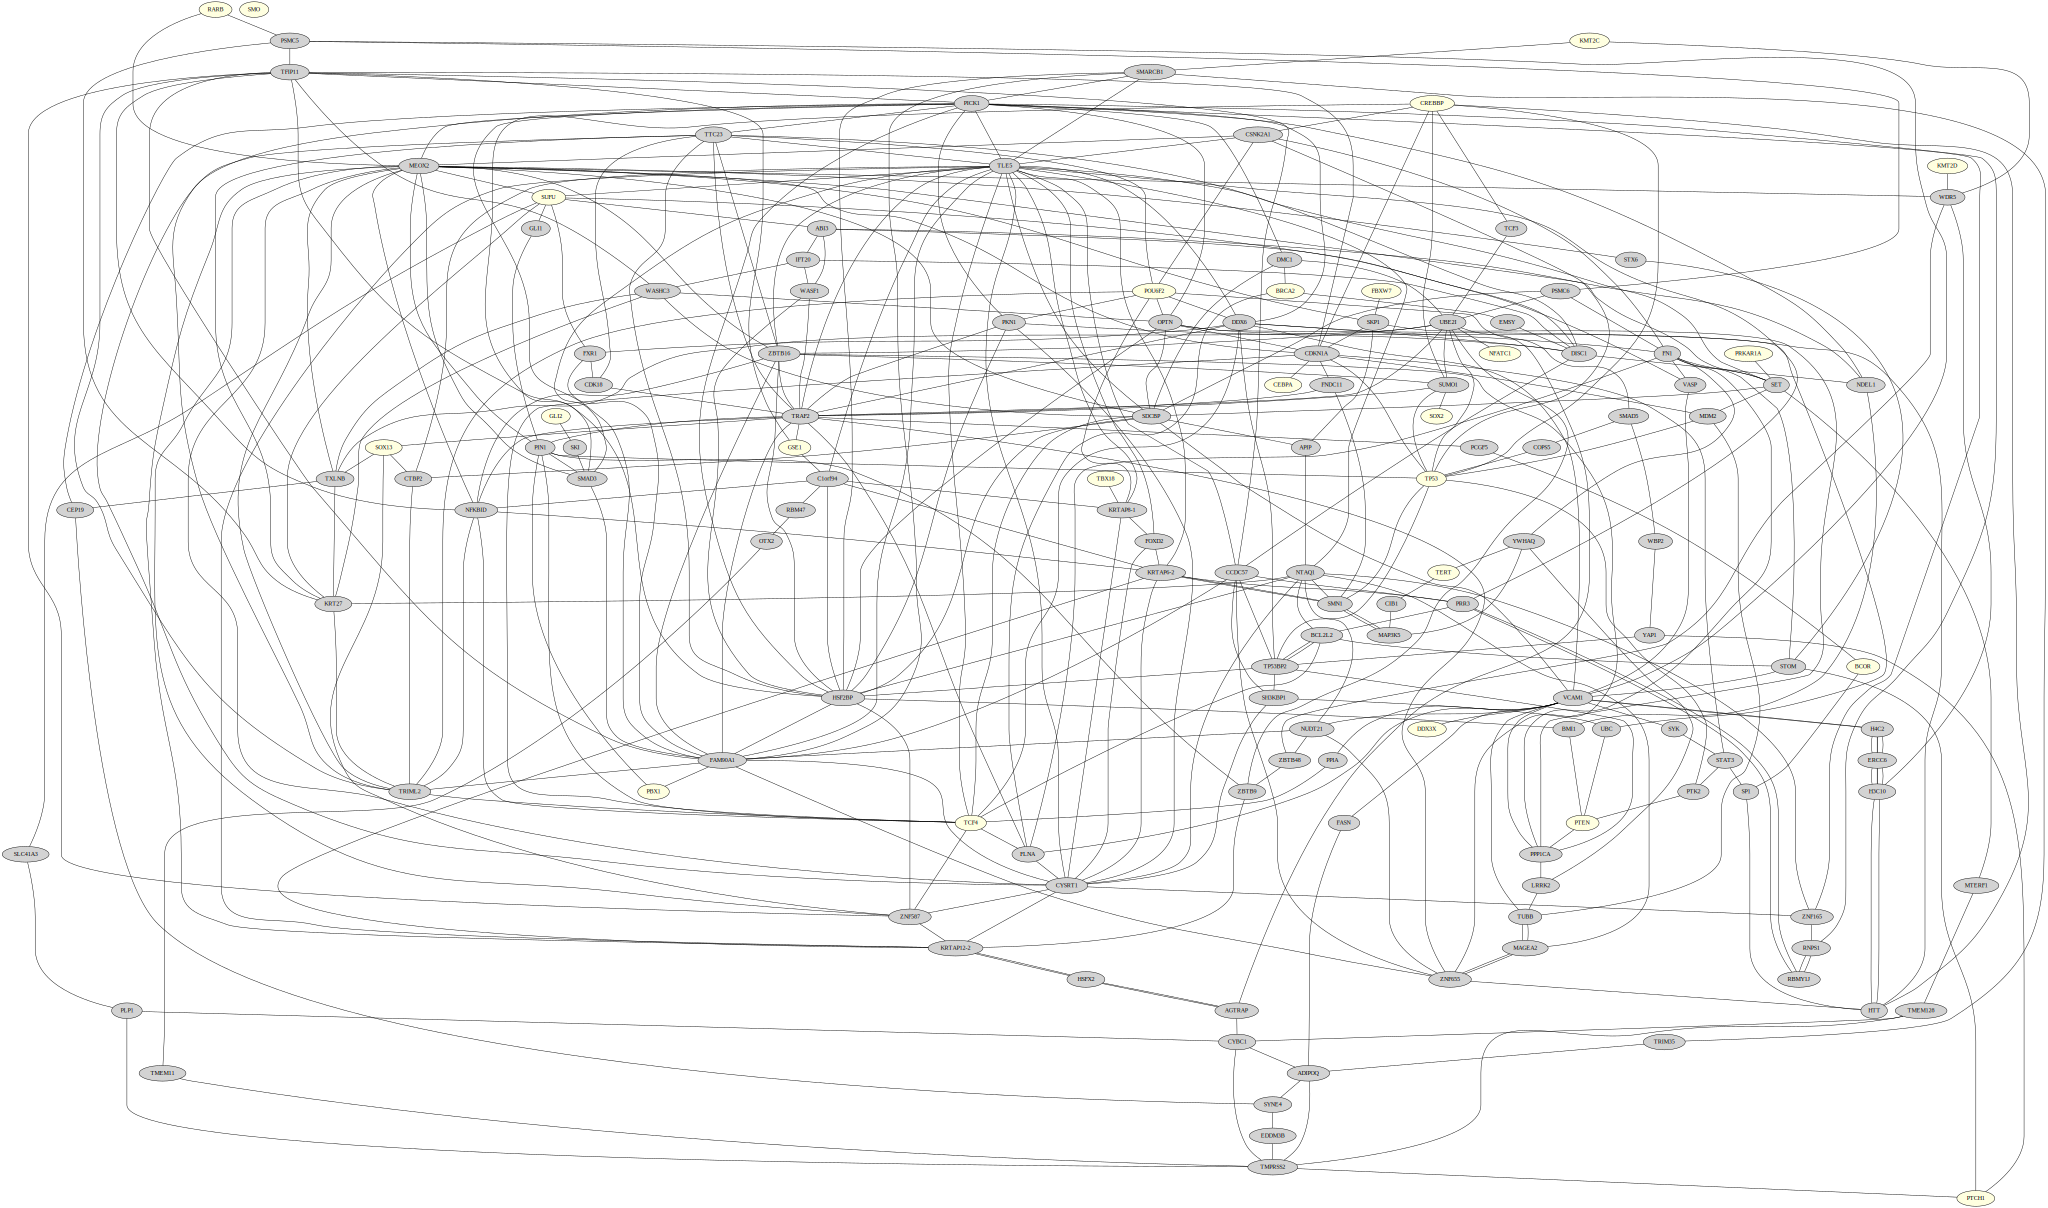

In [61]:
ssh_visualizer = NetworkVisualizer(ssh_net,color_by='effect', noi=True)
output = figures_folder + "SSH_HURI"
ssh_visualizer.render(output_file=output)

In [62]:
from neko._outputs.exports import Exports

In [63]:
export = Exports(ssh_net)

In [64]:
folder = sif_output + "SSH_HURI.sif"

In [65]:
export.export_sif(folder)